描述性统计：
                      count        mean         std           min         25%  \
coverage_95           557.0    0.489347    0.269520      0.000000    0.272727   
coverage_50           557.0    0.309260    0.211306      0.000000    0.132075   
kge                   557.0   -1.076813   18.752428   -391.351303   -0.101637   
nse                   557.0  -40.520929  660.269584 -12378.872673   -0.468386   
nrmse                 557.0    2.083370   19.756562      0.222462    0.608986   
kge_median            557.0   -1.079483   18.809203   -393.140898   -0.099207   
nse_median            557.0  -40.972625  667.610577 -12509.566908   -0.504719   
ci_width_95           557.0  298.155585  360.821255      6.220729  104.070337   
ci_width_50           557.0  162.643161  196.404444      2.556158   56.246397   
relative_ci_width_95  557.0    2.399173   21.333748      0.020467    0.586247   
mean_qobs             557.0  406.746203  648.445402      0.185663   97.096000   

                    

/tmp/ipykernel_12257/1371661266.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = df.groupby('flow_group')[['coverage_95', 'ci_width_95', 'kge', 'nse']].mean()
/tmp/ipykernel_12257/1371661266.py:38: UserWarning: Glyph 35206 (\N{CJK UNIFIED IDEOGRAPH-8986}) missing from current font.
  plt.savefig('boxplot_coverage_ci.png')  # 保存图像
/tmp/ipykernel_12257/1371661266.py:38: UserWarning: Glyph 30422 (\N{CJK UNIFIED IDEOGRAPH-76D6}) missing from current font.
  plt.savefig('boxplot_coverage_ci.png')  # 保存图像
/tmp/ipykernel_12257/1371661266.py:38: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  plt.savefig('boxplot_coverage_ci.png')  # 保存图像
/tmp/ipykernel_12257/1371661266.py:38: UserWarning: Glyph 21644 (\N{CJK UNIFIED IDEOGRAPH-548C}) missing from cu

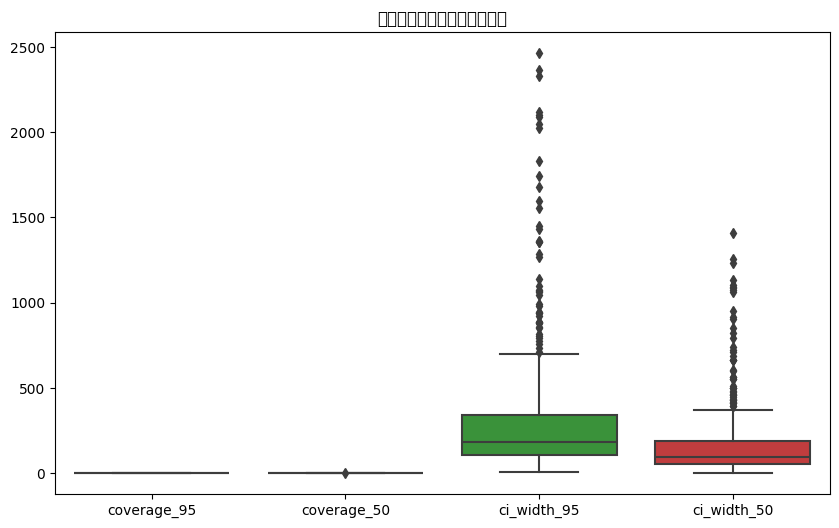

/tmp/ipykernel_12257/1371661266.py:45: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  plt.savefig('scatter_relative_ci_kge.png')
/tmp/ipykernel_12257/1371661266.py:45: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from current font.
  plt.savefig('scatter_relative_ci_kge.png')
/tmp/ipykernel_12257/1371661266.py:45: UserWarning: Glyph 23485 (\N{CJK UNIFIED IDEOGRAPH-5BBD}) missing from current font.
  plt.savefig('scatter_relative_ci_kge.png')
/tmp/ipykernel_12257/1371661266.py:45: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  plt.savefig('scatter_relative_ci_kge.png')
/tmp/ipykernel_12257/1371661266.py:45: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from current font.
  plt.savefig('scatter_relative_ci_kge.png')
/tmp/ipykernel_12257/1371661266.py:45: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  plt.savefig('scatter_relative

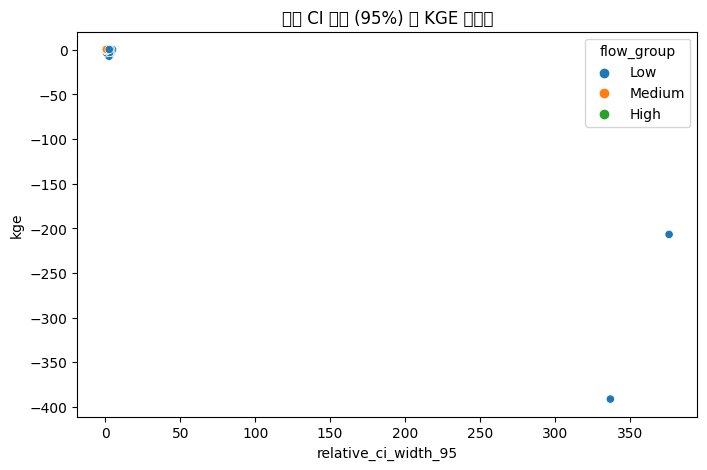

/home/xj/anaconda3/envs/python39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_12257/1371661266.py:52: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  plt.savefig('hist_nrmse.png')
/tmp/ipykernel_12257/1371661266.py:52: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  plt.savefig('hist_nrmse.png')
/home/xj/anaconda3/envs/python39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/xj/anaconda3/envs/python39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.

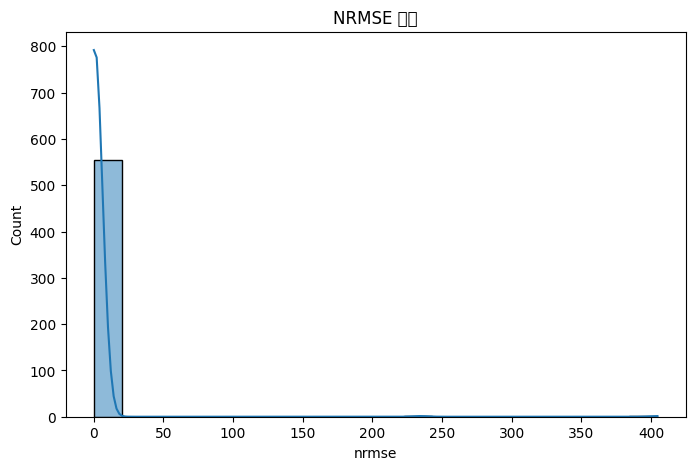


KGE vs. KGE_median 的配对 t-检验: t=0.762, p=0.446
Wilcoxon 秩和检验: stat=72944.000, p=0.211

平均 95% 覆盖率: 0.49%
平均 50% 覆盖率: 0.31%


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('6.coverage_report_node_1.5_noqa_VersionD.csv').dropna()

# 1. 描述性统计（仅数值列）
summary_stats = df.describe(include='number').T  # 转置以便阅读，仅数值列
print("描述性统计：")
print(summary_stats)

# 选择数值列
numeric_cols = df.select_dtypes(include=[np.number]).columns

# 2. 相关性分析（Pearson 和 Spearman）
corr_matrix_pearson = df[numeric_cols].corr(method='pearson')
corr_matrix_spearman = df[numeric_cols].corr(method='spearman')
print("\nPearson 相关矩阵：")
print(corr_matrix_pearson[['ci_width_95', 'relative_ci_width_95', 'kge', 'nse', 'nrmse']])  # 焦点列

# 示例：计算 specific 相关系数
pearson_r, pearson_p = pearsonr(df['relative_ci_width_95'], df['kge'])
print(f"\n相对 CI 宽度 (95%) 与 KGE 的 Pearson 相关系数: r={pearson_r:.3f}, p={pearson_p:.3f}")

# 3. 分组分析：基于 mean_qobs 分组（例如，低/中/高流量）
df['flow_group'] = pd.qcut(df['mean_qobs'], 3, labels=['Low', 'Medium', 'High'])
group_stats = df.groupby('flow_group')[['coverage_95', 'ci_width_95', 'kge', 'nse']].mean()
print("\n按流量分组的平均指标：")
print(group_stats)

# 4. 可视化
# 箱线图：覆盖率和区间宽度
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['coverage_95', 'coverage_50', 'ci_width_95', 'ci_width_50']])
plt.title('覆盖率和可信区间宽度的分布')
plt.savefig('boxplot_coverage_ci.png')  # 保存图像
plt.show()

# 散点图：相对 CI 宽度 vs. KGE
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['relative_ci_width_95'], y=df['kge'], hue=df['flow_group'])
plt.title('相对 CI 宽度 (95%) 与 KGE 的关系')
plt.savefig('scatter_relative_ci_kge.png')
plt.show()

# 直方图：NRMSE 分布
plt.figure(figsize=(8, 5))
sns.histplot(df['nrmse'], bins=20, kde=True)
plt.title('NRMSE 分布')
plt.savefig('hist_nrmse.png')
plt.show()

# 5. 假设检验：比较 KGE 和 KGE_median
from scipy.stats import ttest_rel, wilcoxon
t_stat, t_p = ttest_rel(df['kge'], df['kge_median'])
wilcox_stat, wilcox_p = wilcoxon(df['kge'], df['kge_median'])
print(f"\nKGE vs. KGE_median 的配对 t-检验: t={t_stat:.3f}, p={t_p:.3f}")
print(f"Wilcoxon 秩和检验: stat={wilcox_stat:.3f}, p={wilcox_p:.3f}")

# 6. 覆盖率评估
avg_coverage_95 = df['coverage_95'].mean()
avg_coverage_50 = df['coverage_50'].mean()
print(f"\n平均 95% 覆盖率: {avg_coverage_95:.2f}%")
print(f"平均 50% 覆盖率: {avg_coverage_50:.2f}%")

Positive KGE %: 63.73%
Positive NSE %: 45.96%
NRMSE < 0.6 %: 23.88%
Positive KGE median %: 64.09%
Positive NSE median %: 45.24%

Filtered descriptive stats (after removing KGE < -10 outliers):
                      count        mean         std         min         25%  \
coverage_95           555.0    0.491110    0.268394    0.000000    0.273808   
coverage_50           555.0    0.310374    0.210867    0.000000    0.136917   
kge                   555.0   -0.002864    0.637367   -7.215701   -0.100557   
nse                   555.0   -1.266316    8.220688 -170.493968   -0.449026   
nrmse                 555.0    0.939270    0.627189    0.222462    0.608586   
kge_median            555.0   -0.003252    0.635699   -7.242634   -0.097953   
nse_median            555.0   -1.277725    8.252229 -171.628677   -0.490968   
ci_width_95           555.0  298.937187  361.234388    6.220729  104.337899   
ci_width_50           555.0  163.065091  196.631811    2.556158   56.345539   
relative_ci_width

/tmp/ipykernel_12257/2576929942.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_positive_kge = df.groupby('flow_group')['kge'].apply(lambda x: (x > 0).mean() * 100)
/tmp/ipykernel_12257/2576929942.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_positive_nse = df.groupby('flow_group')['nse'].apply(lambda x: (x > 0).mean() * 100)
/tmp/ipykernel_12257/2576929942.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence thi

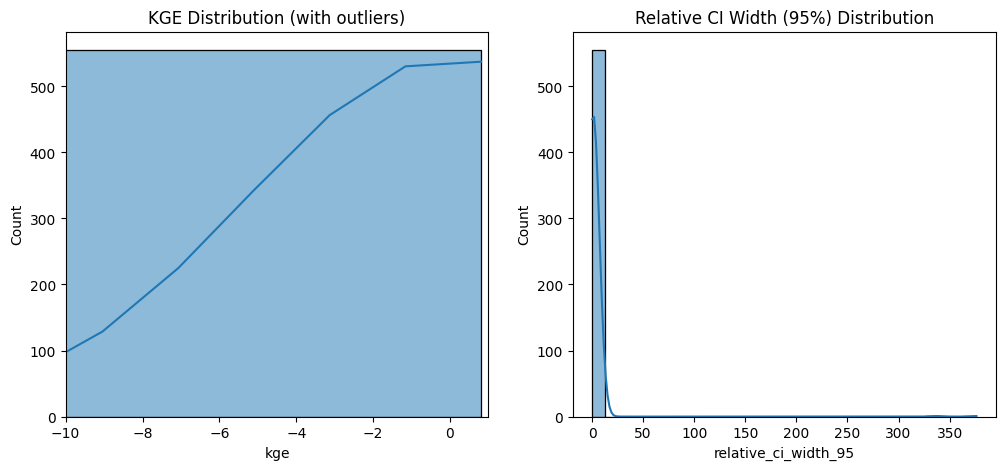

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 计算正值/NRMSE低值占比
total_sites = len(df)
positive_kge_pct = (df['kge'] > 0).mean() * 100
positive_nse_pct = (df['nse'] > 0).mean() * 100
low_nrmse_pct = (df['nrmse'] < 0.6).mean() * 100

positive_kge_median_pct = (df['kge_median'] > 0).mean() * 100
positive_nse_median_pct = (df['nse_median'] > 0).mean() * 100

print(f"Positive KGE %: {positive_kge_pct:.2f}%")
print(f"Positive NSE %: {positive_nse_pct:.2f}%")
print(f"NRMSE < 0.6 %: {low_nrmse_pct:.2f}%")
print(f"Positive KGE median %: {positive_kge_median_pct:.2f}%")
print(f"Positive NSE median %: {positive_nse_median_pct:.2f}%")

# 2. 移除极端值后的统计（e.g., KGE > -10，去除严重负偏差）
df_filtered = df[df['kge'] > -10]
filtered_summary = df_filtered.describe(include='number').T
print("\nFiltered descriptive stats (after removing KGE < -10 outliers):")
print(filtered_summary)

# 3. 按 flow_group 计算正值占比
group_positive_kge = df.groupby('flow_group')['kge'].apply(lambda x: (x > 0).mean() * 100)
group_positive_nse = df.groupby('flow_group')['nse'].apply(lambda x: (x > 0).mean() * 100)
group_low_nrmse = df.groupby('flow_group')['nrmse'].apply(lambda x: (x < 0.6).mean() * 100)

print("\nPositive KGE % by flow group:")
print(group_positive_kge)
print("\nPositive NSE % by flow group:")
print(group_positive_nse)
print("\nNRMSE < 0.6 % by flow group:")
print(group_low_nrmse)

# # 4. 可视化：KGE 和 relative_ci_width_95 的分布
# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# sns.histplot(df['kge'], bins=30, kde=True)
# plt.title('KGE Distribution (with outliers)')
# plt.xlim(-10, 1)  # 聚焦非极端区域

# plt.subplot(1, 2, 2)
# sns.histplot(df['relative_ci_width_95'], bins=30, kde=True)
# plt.title('Relative CI Width (95%) Distribution')
# plt.savefig('distributions.png')
# plt.show()